# Image Style Transfer using CNN

In [ ]:
import torch

from matplotlib import pyplot as plt

from styletransfer import styletransfer as style
from utils.images import load_image, tensor_to_image

In [ ]:
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
# Load image and style image
img_name, style_name = "lions", "picasso"
img = load_image("styletransfer/images/" + img_name + ".jpg").to(device)
style_img = load_image("styletransfer/images/" + style_name + ".jpg", shape=img.shape[2:]).to(
    device
)

The canvas is a photo of a group of lions in the Serengeti National Park (Tanzania) I took during a family safari in 2018.

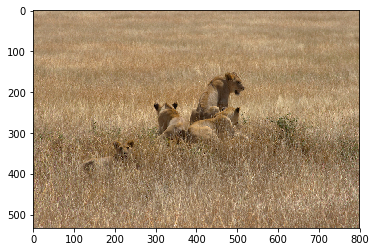

In [ ]:
plt.imshow(tensor_to_image(img))

The style image is a painting by Pablo Picasso (reshaped to have the same height and width of the canvas).

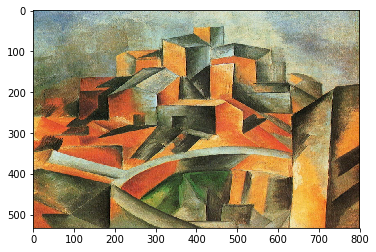

In [ ]:
plt.imshow(tensor_to_image(style_img))

The following create a `StyleTransfer` object that handles all the aspect of style transfer. It just takes the canvas, the style image and the device.

In [ ]:
# Define style transfer object
st = style.StyleTransfer(img, style_img, device=device)

The parameters for style transfer (numer of epochs, optimizer, weights, ...) are given as arguments to the `run` function, so that style transfer can be run multiple times with different parameters (using the same canvas and style image).

In [ ]:
# Perform style transfer
target = st.run(2500)

In [ ]:
plt.figure()
plt.imshow(tensor_to_image(target))
plt.savefig("styletransfer/data/" + img_name + "_" + style_name + ".png")

From my experimentation, image style transfer work better when the colors in the style image and in the canvas are similar.

## Standalone Image Style Transfer CLT

The `styletransfer.py` module also be used as a standalone image style transfer command line tool.

In [ ]:
!python styletransfer/styletransfer.py --help